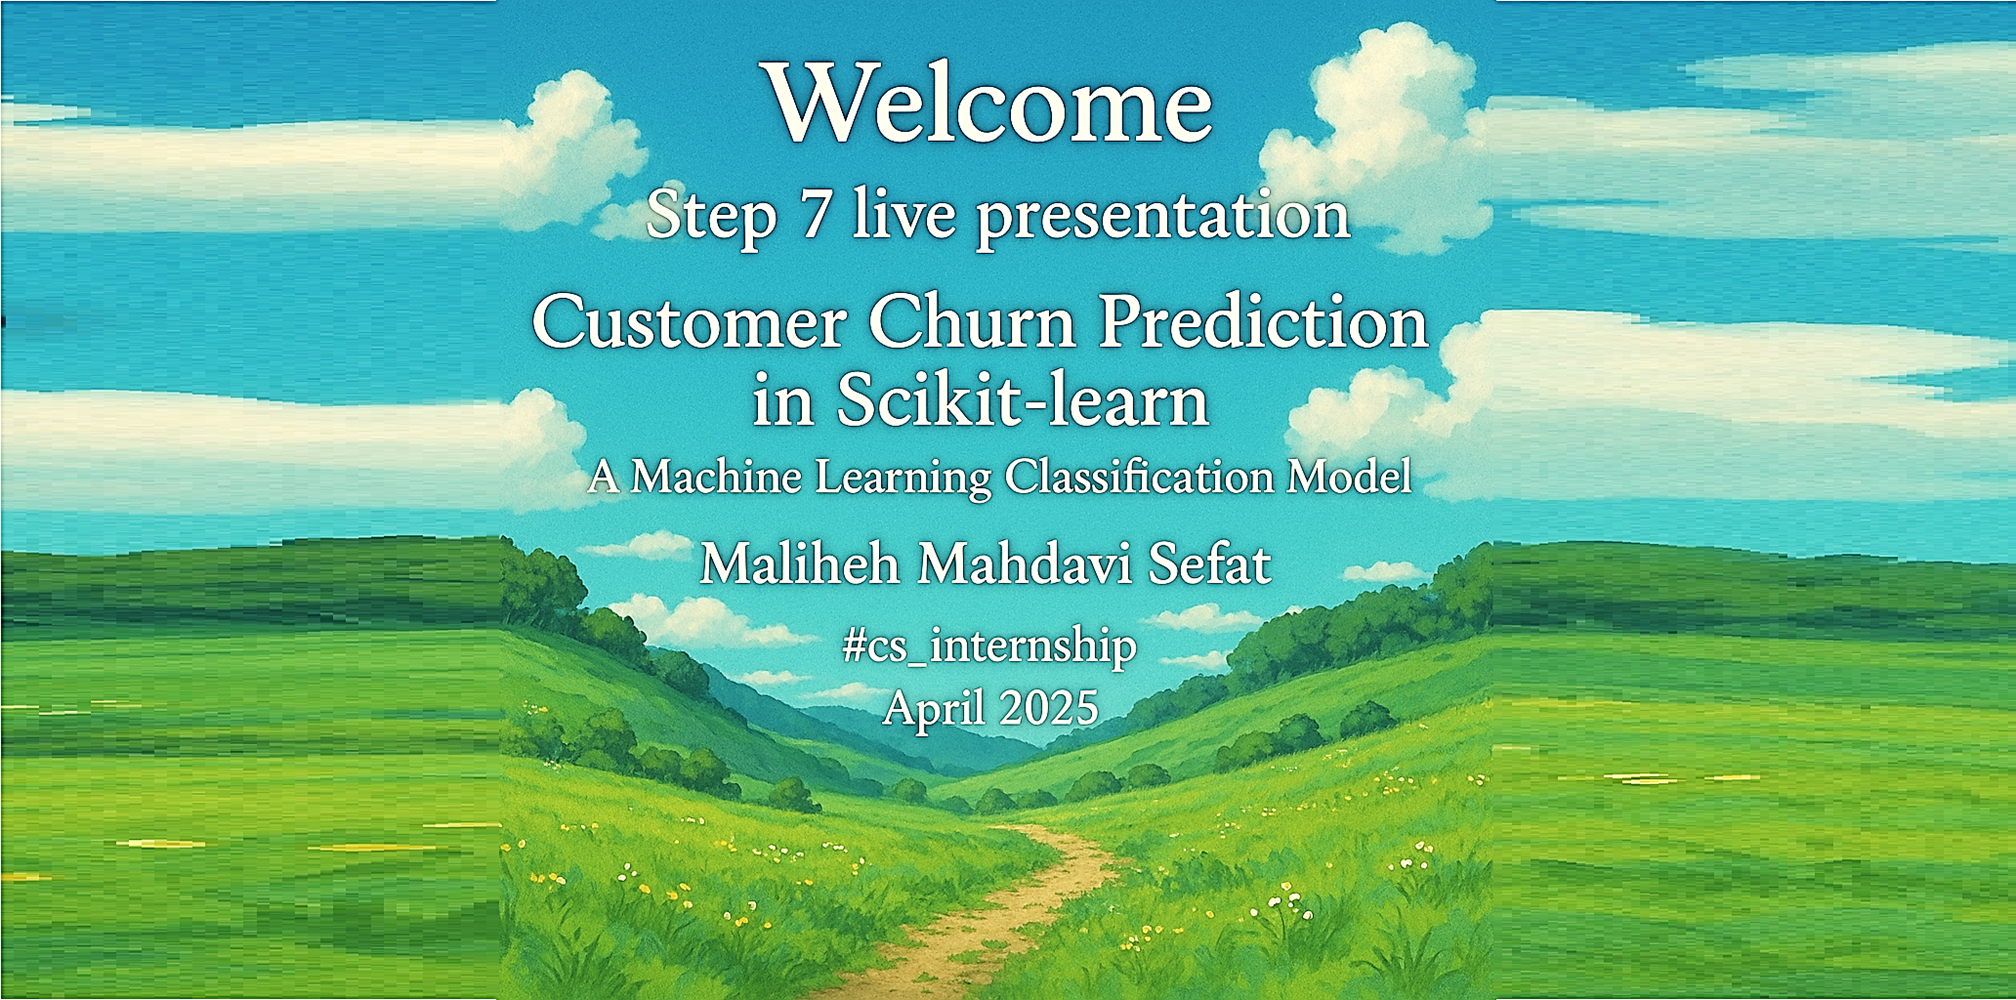


<img src="churn.jpg" width="850" height="300" >

#  What we see today:


<ul>
    <li><strong>Preprocessing</strong>: 
        <ul>
            <li>Numerical data: Imputation using the mean and scaling with <code>StandardScaler()</code>.</li>
            <li>Categorical data: Imputation with the most frequent value and one-hot encoding with <code>OneHotEncoder()</code>.</li>
        </ul>
    </li>
    <li><strong>Dimensionality Reduction</strong>: <code>PCA</code> Compressing data while retaining variance.</li>
    <li><strong>Pipeline</strong>: Streamlines preprocessing, feature selection, and modeling.</li>
    <li><strong>Hyperparameter Tuning</strong>: With the use of <code>GridSearchCV()</code> to find the best combination of parameters.</li>
    <li><strong>Overfitting/Underfitting assessment</strong>: Compares training and test accuracies.</li>
    <li><strong>Confusion Matrix</strong>: Visualizes model performance, displays number of True positives/negatives, False positives/negatives.</li>
    <li><strong>Performance Evaluation</strong> : Various performance metrics such as <code>accuracy</code> and <code>recall</code>.</li>
</ul>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

<div style="background-color: black;color:white; padding: 20px"><b> Load the dataset from</b>
<a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn" target="_blank"><b>Telco Customer Churn Dataset</b></a>
</div>

In [2]:
# Load dataset
import pandas as pd
churndf = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churndf.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [3]:
# observe the dataset
churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<div style=" background-color: burlywood; padding: 10px;">
<h2> Preprocessing </h2>
<ul>
        <li><b>Missing values</b>: drop or impute</li>
        <li><b>Unusual data</b></li>
        <li><b>Categorical data</b>: ordinal or nominal</li>
        <li><b>Numerical data</b>: scaling, standardization or normalization</li>
    </ul>
</div>


In [4]:
# Dropping irrelevant columns
churndf.drop(['customerID'], axis=1, inplace=True)
churndf.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Display unique values for each feature
for column in churndf.columns:
    print(churndf[column].value_counts())
    print(churndf[column].unique()[:10],"\n")

gender
Male      3555
Female    3488
Name: count, dtype: int64
['Female' 'Male'] 

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
[0 1] 

Partner
No     3641
Yes    3402
Name: count, dtype: int64
['Yes' 'No'] 

Dependents
No     4933
Yes    2110
Name: count, dtype: int64
['No' 'Yes'] 

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
[ 1 34  2 45  8 22 10 28 62 13] 

PhoneService
Yes    6361
No      682
Name: count, dtype: int64
['No' 'Yes'] 

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
['No phone service' 'No' 'Yes'] 

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
['No' 'Yes' 'No internet ser

In [6]:
# Finding columns with 'Yes' and 'No' values
yes_no = [col for col in churndf.columns if set(['Yes', 'No']).issubset(churndf[col].unique())]
yes_no

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

<img src="categorical.png" width="700" height="300">

In [7]:
# Map 'Yes' to 1, 'No' to 0, 'No ... Service' to -1
churndf[yes_no] = churndf[yes_no].map(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else -1))

churndf.head(3)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0  Female              0        1           0       1             0   
1    Male              0        0           0      34             1   
2    Male              0        0           0       2             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0             -1             DSL               0             1   
1              0             DSL               1             0   
2              0             DSL               1             1   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   
2                 0            0            0                0   

         Contract  PaperlessBilling     PaymentMethod  MonthlyCharges  \
0  Month-to-month                 1  Electronic check           29.85   
1        One year                 0      Mailed check           56.95   
2  Month-to-month                 1      Mailed check           53.85   

   TotalCharges  Churn  
0         29.85      0  
1       1889.50      0  
2        108.15      1

#

<div style="display: flex; background-color: khaki; padding: 10px">
<div style="flex: 1; padding-top: 50px"> <b>LabeEncoder is usually used for assigning numbers to class lables.</b>
    <p></p>
    <p>"very good"  →  0</p>
    <p>"good"       →  1</p>
    <p>"normal"     →  2</p>
    <p>"bad"        →  3</p>
    <p>"very bad"   →  4</p>
</div>
  <div style="flex: 1;">

<img src="le.png" width="650" height="300">
  </div>  </div>

In [8]:
# Lable Encoding is usually used for class lables
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()
# Apply LabelEncoder to the gender column
churndf['gender'] = le.fit_transform(churndf['gender']) 
# chack the change
churndf.head(2)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0             -1             DSL               0             1   
1              0             DSL               1             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   

         Contract  PaperlessBilling     PaymentMethod  MonthlyCharges  \
0  Month-to-month                 1  Electronic check           29.85   
1        One year                 0      Mailed check           56.95   

   TotalCharges  Churn  
0         29.85      0  
1       1889.50      0

In [9]:
churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


## Splitting Columns

In [10]:
# Determining target and features
X = churndf.drop('Churn', axis=1)  # feature matrix
y = churndf['Churn']               # target vector

In [11]:
# Splitting the dataset into train and test portions
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

## Resume Preprocessing

In [12]:
# Separating numerical and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns
cat_features

Index(['InternetService', 'Contract', 'PaymentMethod'], dtype='object')


# A CONCEPT: Scaling numerical data

<div style="display: flex; background-color: wheat; padding: 10px">
    <div style="flex: 1; padding-top: 20px"> <p></p>
        <h2>Feature Scaling</h2>
      <b>Normalization</b> 
        <p>MinMaxScaler()</p>
      <p>Maps the range of data to a specific range, usually the minimum to 0 and maximum to 1.</p> <p></p>
      <b>Standardization</b> 
        <p>StandardScaler()</p>
      <p>Transforms the data to have a mean of 0 and a standard deviation of 1.</p>
    </div>
    <div style="flex: 1;">
        <img src="Image Mar 29, 2025.png" height="70%" >
    </div>  
</div>


# TOPIC:  One Hot Encoding

<div style="display: flex; background-color: lemonchiffon; padding: 10px">
    <div style="flex: 1; padding-top: 40px"> 
    <p></p>
      <b>pandas.get_dummies()</b> <p></p>
      <p>Quickly performs one-hot encoding but does not handle unseen categories in new data.</p>
    <p></p>
    <b>OneHotEncoder() from Scikit-learn</b> <p></p>
      <p>Handles one-hot encoding with <code>handle_unknown='ignore'</code>, allowing the model to process unseen categories errors.</p>
        <p>Can use <code>drop='first'</code> to avoid multicollinearity and prevent redundancy</p>
    </div>
    <div style="flex: 1;">
        <img src="onehot.png" height="70%" >
    </div>  
</div>


# STRUCTURE:  Pipeline

<div style="display: flex; background-color: #16241a">
<div style="flex: 1;background-color:#16241a; color: white; padding: 10px; padding-top:50px"> 
    <p> <b>Pipeline:</b> is a tool that automates a sequence of data preprocessing steps and model training/testing.</p>
    <p> It ensures that all steps are executed in the correct order, maintaining consistency and reproducibility. </p>
    <p>For example, it can combine feature scaling, encoding, and model fitting into a single workflow, simplifying and streamlining the process. </p>
<ul> 
  <li><b>Pipeline()</b>
    <ul>
      <li>Manually define each step with a name.</li>
    </ul>
  </li>
  <li><b>make_pipeline()</b>
    <ul>
      <li>Quicker to implement.</li>
      <li>Does not require naming the steps.</li>
      <li>The last step must always be an estimator.</li>
    </ul>
  </li>
</ul>
  </div>
  <div style="flex: 1; padding: 10px;">
    <img src="p.png" alt="Pipeline Image">
  </div>
</div>


<div style=" background-color: lightsalmon; padding: 15px;">
<h2> Creating custom preprocessor for pipeline </h2>

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# With Pipeline, we manually define each step with a name and the corresponding transformer or model
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

<img src="pca.png" width="8000" height="400">

In [14]:
from sklearn.decomposition import PCA

# Dimensionality reduction (e.g., PCA)
pca = PCA()

In [15]:
from sklearn.linear_model import LogisticRegression

# Model
model = LogisticRegression()

In [16]:
# Building the final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dim_reduction', pca),
    ('classifier', model)
])

<div style=" background-color: lavender; padding: 10px;">
<h2> Hyperparameter tuning using GridSearchCV </h2>
 <p><b>Grid search </b> is a method for tuning hyperparameters of a machine learning model by systematically trying out different combinations of predefined values to find the best configuration based on performance metrics.</p>

</div>


In [17]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = [
    {
        'dim_reduction__n_components': [3, 5, 8],
        'classifier__solver': ['liblinear'],
        'classifier__penalty': ['l1'],
        'classifier__C': [0.1, 1.0, 10.0]
    },
    {
        'dim_reduction__n_components': [3, 5, 8],
        'classifier__solver': ['lbfgs'],
        'classifier__penalty': ['l2'],
        'classifier__C': [0.1, 1.0, 10.0]
    }
]
# Accuracy score: measures the proportion of all correctly classified cases
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:\n", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters:
 {'classifier__C': 10.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'dim_reduction__n_components': 8}
Best Cross-Validation Score: 0.7861151002103725


C:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


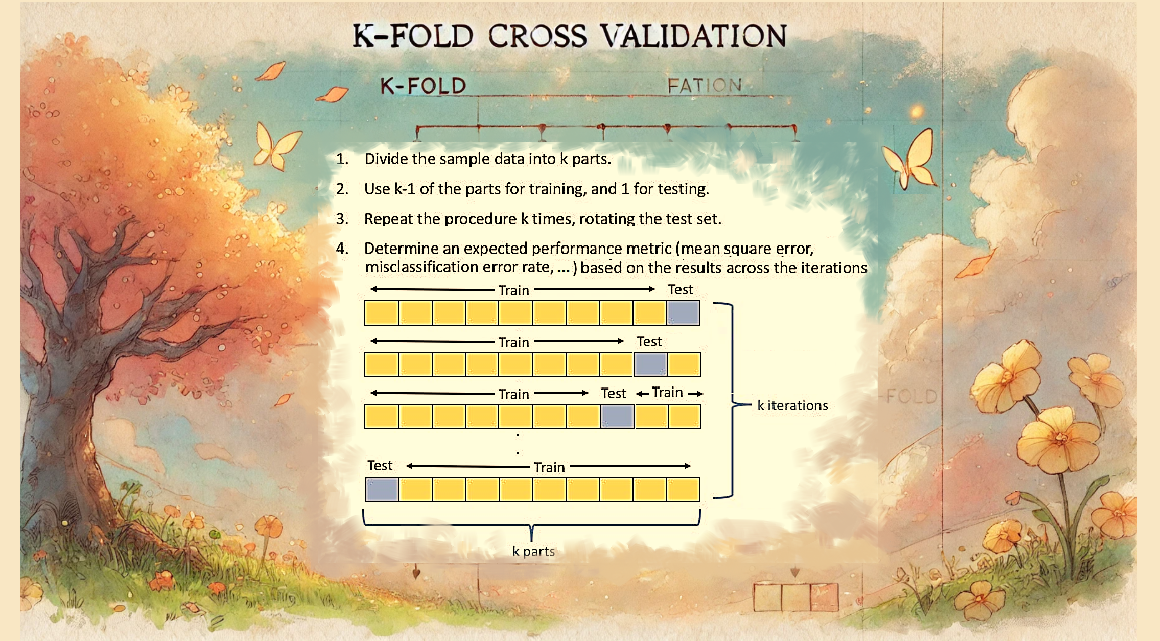

## Diagnosing Overfitting/Underfitting

In [18]:
from sklearn.model_selection import cross_val_score

train_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=10, scoring='accuracy')
test_scores = cross_val_score(grid_search.best_estimator_, X_test, y_test, cv=10, scoring='accuracy')

print("Training Accuracy:", np.mean(train_scores))
print("Test Accuracy:    ", np.mean(test_scores))

if np.mean(train_scores) > np.mean(test_scores) + 0.005:
    print("Model might be overfitting.")
elif np.mean(train_scores) < np.mean(test_scores) - 0.005:
    print("Model might be underfitting.")
else:
    print("Model performance looks balanced.")

Training Accuracy: 0.7861151002103725
Test Accuracy:     0.787112462006079
Model performance looks balanced.


## Final Evaluation


In [19]:
y_pred = grid_search.best_estimator_.predict(X_test)

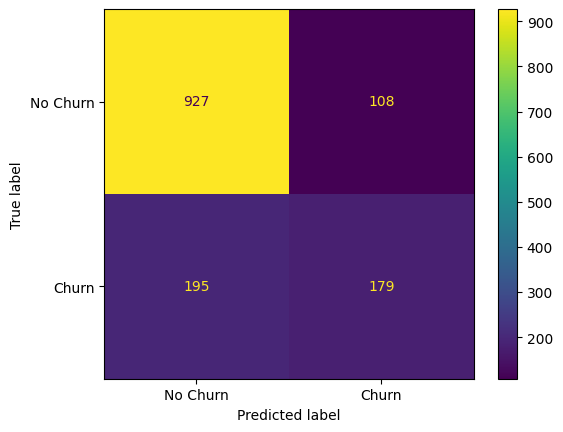

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
confmat = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
confmat.plot();    # [ [TN, FP],
                   #  [FN, TP] ]

In [21]:
# check out some perfomance metrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



<div style=" background-color: gold; padding: 10px;">
<ul>         
    <li><b>Precision: </b> The proportion of correctly predicted positive observations out of all predicted positives. 
        <b>= TP/(TP+FP)</b></li>
    <li><b>Recall: </b> The proportion of correctly predicted positive observations out of all actual positives. <b> =TP/(TP+FN)</b></li>
    <li><b>F1-score: </b> The harmonic mean of precision and recall, balancing the two metrics.</li>
    <li><b>Support: </b> The number of actual occurrences of each class in the dataset.</li>
    <li><b>Accuracy: </b> The proportion of all correctly classified cases.<b> =(TP+TN)/(TP+TN+FP+FN)</b></li>
    <li><b>Macro avg: </b> The unweighted mean of metrics (e.g., precision, recall, F1) computed per class.</li>
    <li><b>Weighted avg: </b> The mean of metrics (e.g., precision, recall, F1) weighted by the number of samples in each class.</li>
        </ul>
</div>

<img src="thanks.gif" width="850" height="300" >

## Trying Support Vector Machine

In [22]:
from sklearn.svm import SVC

# Choosing a model
model1 = SVC(random_state=1)

In [23]:
# Building the final pipeline
pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dim_reduction', pca),
    ('classifier', model1)
])

In [24]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_range = [0.1, 1.0, 10.0]
param_grid1 = [
    {
        'dim_reduction__n_components': [3, 5, 8],
        'classifier__C': param_range,
        'classifier__kernel': ['linear']
    },
    {
        'dim_reduction__n_components': [3, 5, 8],
        'classifier__C': param_range,
        'classifier__gamma': param_range,
        'classifier__kernel': ['rbf']
    }
]


grid_search1 = GridSearchCV(pipeline1, param_grid1, cv=10, scoring='accuracy', refit=True, n_jobs=-1)
grid_search1.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:\n", grid_search1.best_params_)
print("Best Cross-Validation Score:", grid_search1.best_score_)

Best Parameters:
 {'classifier__C': 10.0, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'dim_reduction__n_components': 8}
Best Cross-Validation Score: 0.7987169797059824


In [25]:
from sklearn.model_selection import cross_val_score

# Diagnosing Overfitting/Underfitting
train_scores1 = cross_val_score(grid_search1.best_estimator_, X_train, y_train, cv=10, scoring='accuracy')
test_scores1 = cross_val_score(grid_search1.best_estimator_, X_test, y_test, cv=10, scoring='accuracy')
print("Training Accuracy:", np.mean(train_scores1))
print("Test Accuracy:    ", np.mean(test_scores1))

if np.mean(train_scores1) > np.mean(test_scores1) + 0.005:
    print("Model might be overfitting.")
elif np.mean(train_scores1) < np.mean(test_scores1) - 0.005:
    print("Model might be underfitting.")
else:
    print("Model performance looks balanced.")

Training Accuracy: 0.7987169797059824
Test Accuracy:     0.7707852077001013
Model might be overfitting.


In [26]:

# Final Evaluation
y_pred1 = grid_search1.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



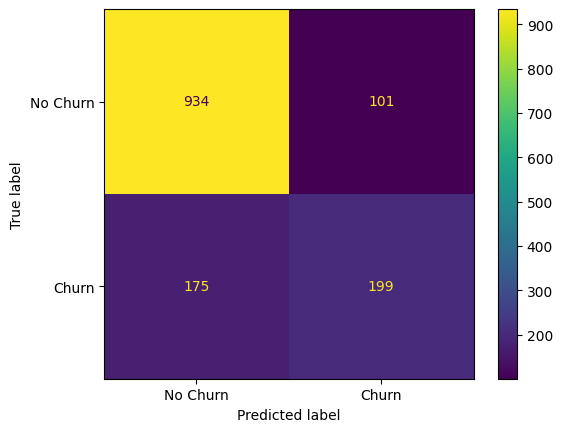

In [27]:
# Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred1)
confmat1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['No Churn', 'Churn'])
confmat1.plot();